### 네이버 웹툰 url 크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup

URL_TOTAL_LIST = 'https://comic.naver.com/webtoon/weekday.nhn'

response = requests.get(URL_TOTAL_LIST)

soup = BeautifulSoup(response.text, 'html.parser')

class_title_a_list = soup.select('a.title')

title_list = []

for a in class_title_a_list:
    a_href = a.get('href') # a['href']
    a_text = a.get_text()
    result = f'{a_text} (https://comic.naver.com/{a_href})'
    title_list.append(result)

title_list

# 각 url(덴마)의 최근 10화 제목+평점+등록일 2중 리스트로 만들기

In [89]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

URL = 'https://comic.naver.com/webtoon/list.nhn?titleId=119874&weekday=sun'
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')



table=soup.find('table',{'class':'viewList'})
tr = table.find_all('tr')

sw=0
list=[]

for i in tr:
    if sw<=1:
        sw=sw+1
        continue
        
    tds=i.find_all('td')
    
    result=[]
    cnt=0
    
    for td in tds:
        
        td=str(td)
        td=re.sub('<.+?>', '', td, 0).strip()
        if cnt == 2:
            s=td.strip("평점\n")[0]
            s1=td.strip("평점\n")[1]
            s2=td.strip("평점\n")[2]
            s3=td.strip("평점\n")[3]
            s4=s+s1+s2+s3
            result.append(float(s4))
        if cnt != 0 and cnt !=2:
            result.append(td)
        cnt=cnt+1
    list.append(result)
    
list


[['3-406화 2.에필로그(4-3)', 4.31, '2019.12.11'],
 ['3-405화 2.에필로그(4-2)', 6.96, '2019.12.08'],
 ['3-404화 2.에필로그(4-1)', 7.2, '2019.12.06'],
 ['3-403화 2.에필로그(3-29)', 7.5, '2019.12.04'],
 ['3-402화 2.에필로그(3-28)', 7.73, '2019.12.02'],
 ['3-401화 2.에필로그(3-27)', 6.98, '2019.11.30'],
 ['3-400화 2.에필로그(3-26)', 7.6, '2019.11.27'],
 ['3-399화 2.에필로그(3-25)', 6.36, '2019.11.25'],
 ['3-398화 2.에필로그(3-24)', 7.26, '2019.11.23']]

# 주요정보 딕셔너리로 변환후 df만들기

In [99]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

URL = 'https://comic.naver.com/webtoon/list.nhn?titleId=119874&weekday=sun'
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')



table=soup.find('table',{'class':'viewList'})
tr = table.find_all('tr')

sw=0

title=[]
score=[]
day=[]
month=[]
year=[]

for i in tr:
    if sw<=1:
        sw=sw+1
        continue
        
    tds=i.find_all('td')  
    
    cnt=0
    for td in tds:
        
        td=str(td)
        td=re.sub('<.+?>', '', td, 0).strip()
        if cnt ==1:
            title.append(td)
        if cnt==3:
            d=td.strip('.')
            y=d[0]+d[1]+d[2]+d[3]
            d_re=d[8]+d[9]
            m=d[5]+d[6]
            month.append(m)
            year.append(y)
            day.append(d_re)
            
        if cnt == 2:
            s=td.strip("평점\n")
            s_re=s[0]+s[1]+s[2]+s[3]
            score.append(float(s_re))
        cnt=cnt+1

dic={'title':title,'score':score,'day':day,'month':month,'year':year}
df=pd.DataFrame.from_dict(dic)
df

,title,score,day,month,year
0,3-406화 2.에필로그(4-3),4.31,11,12,2019
1,3-405화 2.에필로그(4-2),6.96,08,12,2019
2,3-404화 2.에필로그(4-1),7.20,06,12,2019
3,3-403화 2.에필로그(3-29),7.50,04,12,2019
4,3-402화 2.에필로그(3-28),7.73,02,12,2019
5,3-401화 2.에필로그(3-27),6.98,30,11,2019
6,3-400화 2.에필로그(3-26),7.60,27,11,2019
7,3-399화 2.에필로그(3-25),6.36,25,11,2019
8,3-398화 2.에필로그(3-24),7.26,23,11,2019


# groupby를 통한 월별 점수 평균

In [103]:
g_month=df.groupby('month')
g_month.groups

{'11': Int64Index([5, 6, 7, 8], dtype='int64'),
 '12': Int64Index([0, 1, 2, 3, 4], dtype='int64')}

In [106]:
def my_mean(values):
    n = len(values)
    
    sum = 0 
    for value in values:
        sum += value
    
    return sum / n
agg_my_mean = df.groupby('month').score.agg(my_mean) 
print(agg_my_mean)

month
11    7.05
12    6.74
Name: score, dtype: float64


# 점수 그래프

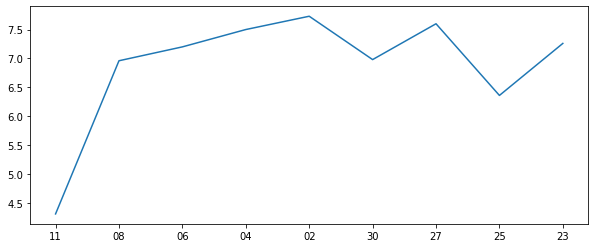

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import NaN

fig = plt.figure(figsize=(10,4))
axis = fig.add_subplot(111)
subset=df[df.year == '2019']
axis.plot(subset['day'], subset['score'])